In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text

In [2]:
# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.6333333333333333


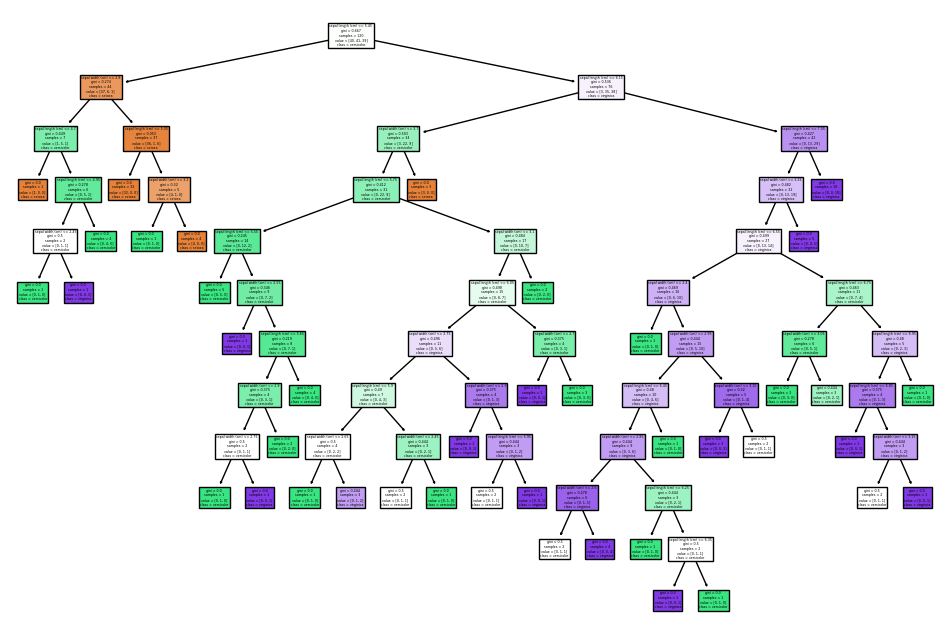

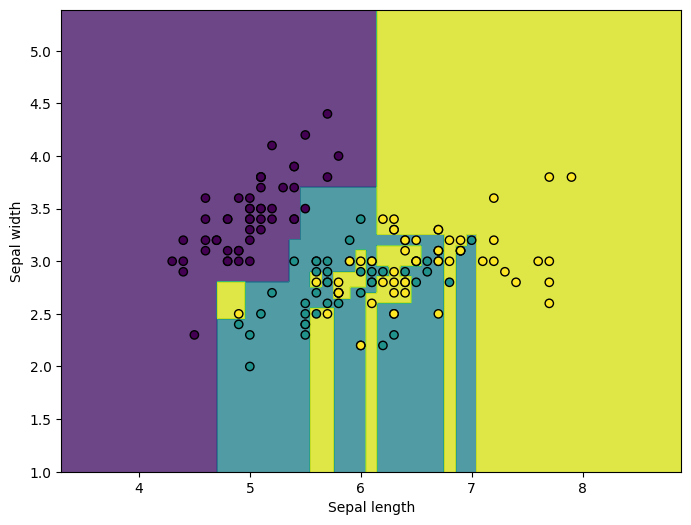

In [ ]:
# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Check accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### Above, We don't have any stopping criteria hence, we are having overfitting. To reduce overfitting we have to do PRUNING.

# Pruning

- ***Pre-pruning (Early stopping):*** This method halts the tree construction early. It can be done in
various ways: by setting a limit on the maximum depth of the tree, setting a limit on the
minimum number of instances that must be in a node to allow a split, or stopping when a split
results in the improvement of the model’s accuracy below a certain threshold.


- ***Post-pruning (Cost Complexity Pruning):*** This method allows the tree to grow to its full size,
then prunes it. Nodes are removed from the tree based on the error complexity trade-off. The
basic idea is to replace a whole subtree by a leaf node, and assign the most common class in
that subtree to the leaf node.

## Pre-Pruning

#### 1. **Maximum Depth**: One of the simplest forms of pre-pruning is to set a limit on the maximum depth of the tree. Once the tree reaches the specified depth during training, no new nodes are created. This strategy is simple to implement and can effectively prevent overfitting, but if the maximum depth is set too low, the tree might be overly simplified and underfit the data.

Accuracy: 0.8


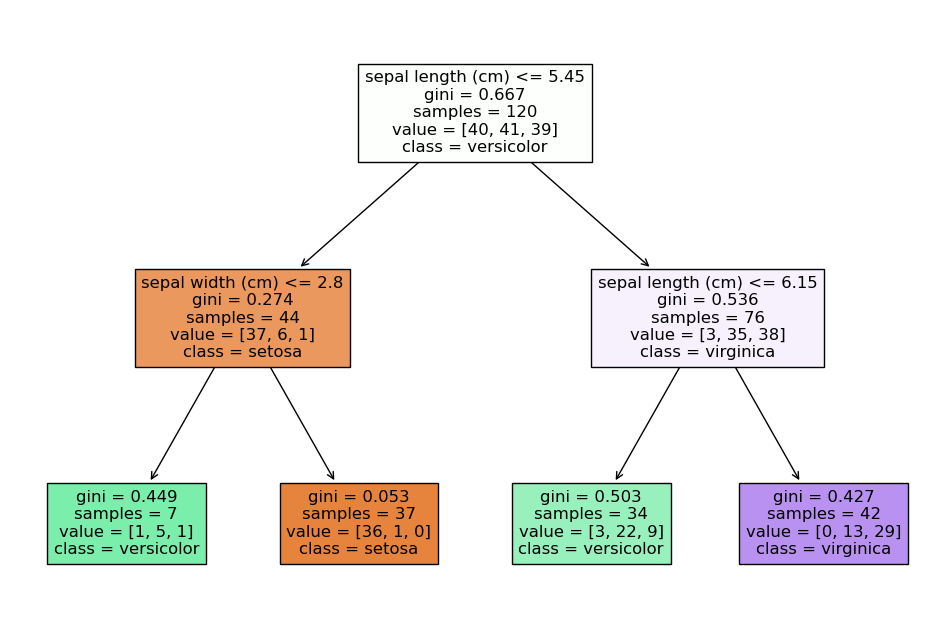

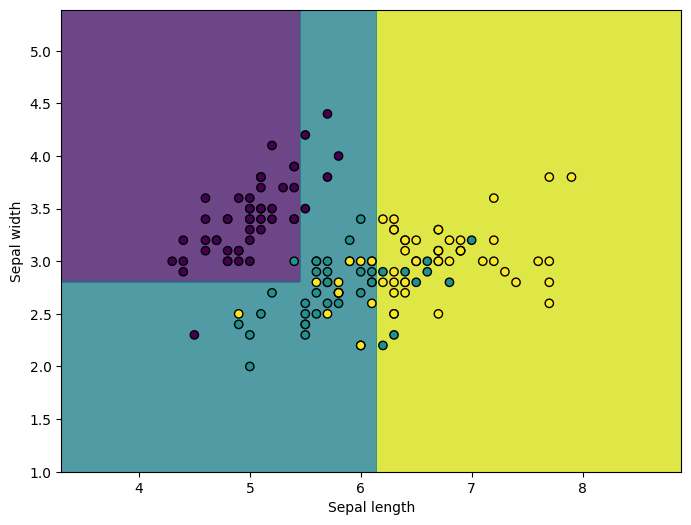

In [ ]:
# Train a DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=2)
clf1.fit(X_train, y_train)

# Check accuracy
y_pred = clf1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf1, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### 2. **Minimum Samples Split**: This is a condition where a node will only be split if the number of samples in that node is above a certain threshold. If the number of samples is too small, then the node is not split and becomes a leaf node instead. This can prevent overfitting by not allowing the model to learn noise in the data.

Accuracy: 0.7333333333333333


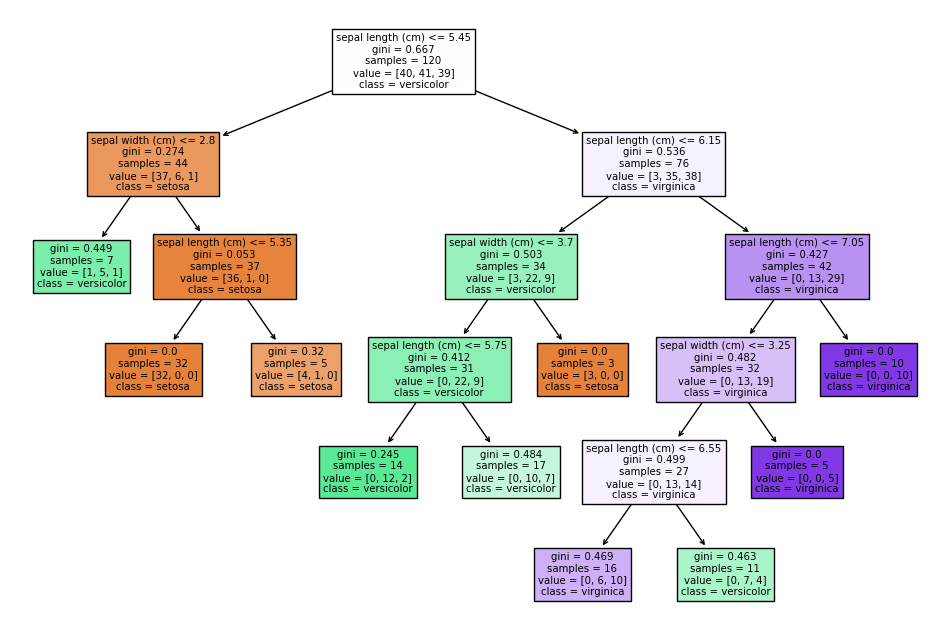

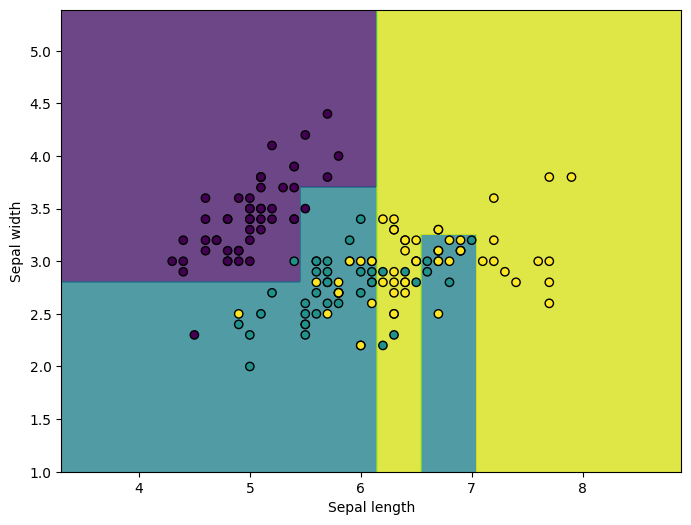

In [ ]:
# Train a DecisionTreeClassifier
clf2 = DecisionTreeClassifier(min_samples_split=20)
clf2.fit(X_train, y_train)

# Check accuracy
y_pred = clf2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### 3. **Minimum Samples Leaf**: This condition requires that a split at a node must leave at least a minimum number of training examples in each of the leaf nodes. Like the minimum samples split, this strategy can prevent overfitting by not allowing the model to learn from noise in the data.

Accuracy: 0.8


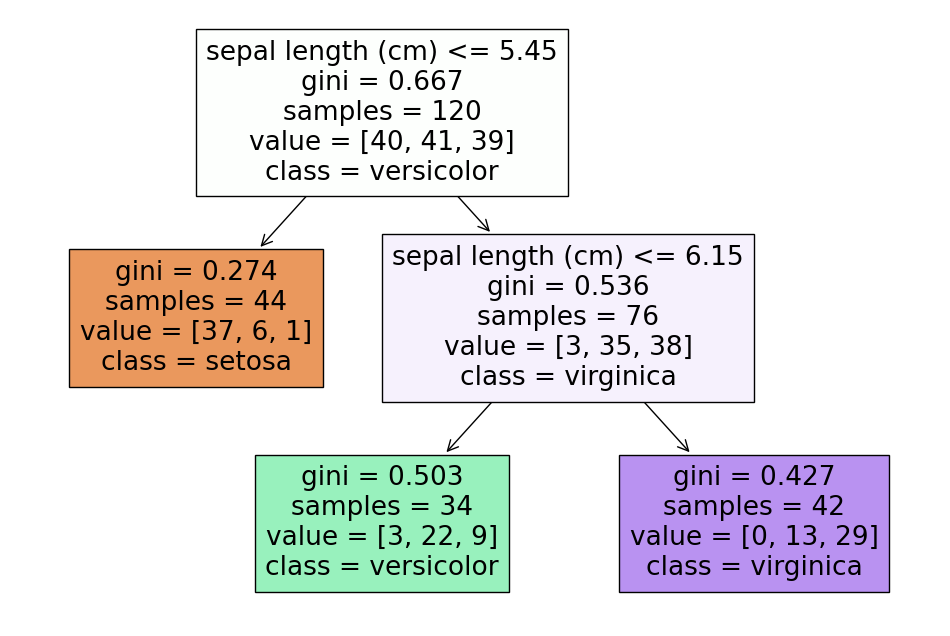

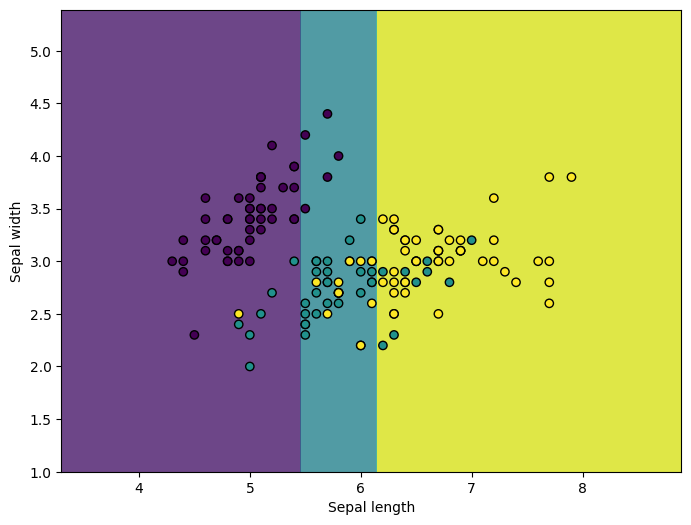

In [ ]:
# Train a DecisionTreeClassifier
clf3 = DecisionTreeClassifier(min_samples_leaf=30)
clf3.fit(X_train, y_train)

# Check accuracy
y_pred = clf3.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf3, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### 4. **Maximum Leaf Nodes**: This strategy limits the total number of leaf nodes in the tree. The tree stops growing when the number of leaf nodes equals the maximum number.

Accuracy: 0.8333333333333334


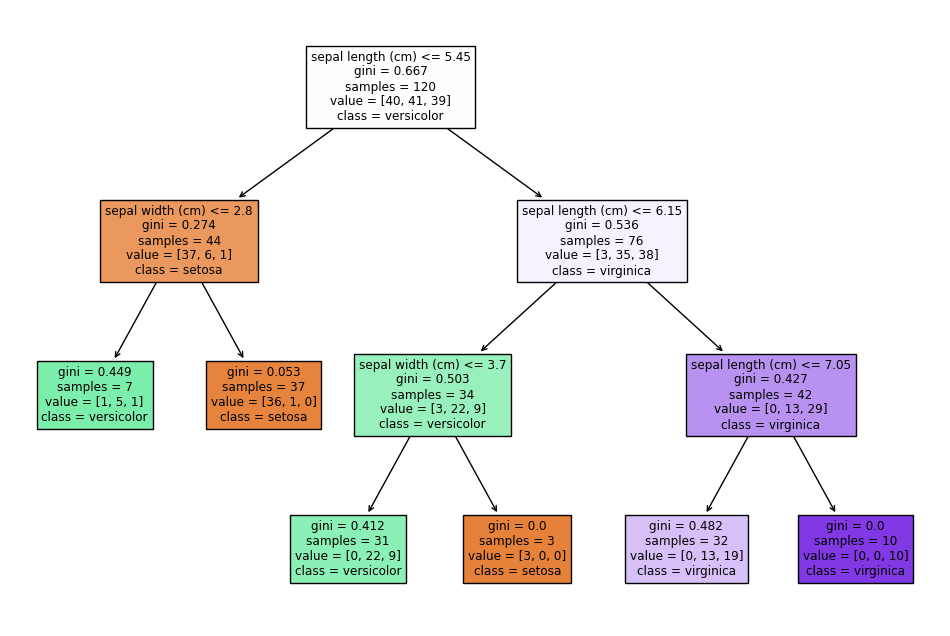

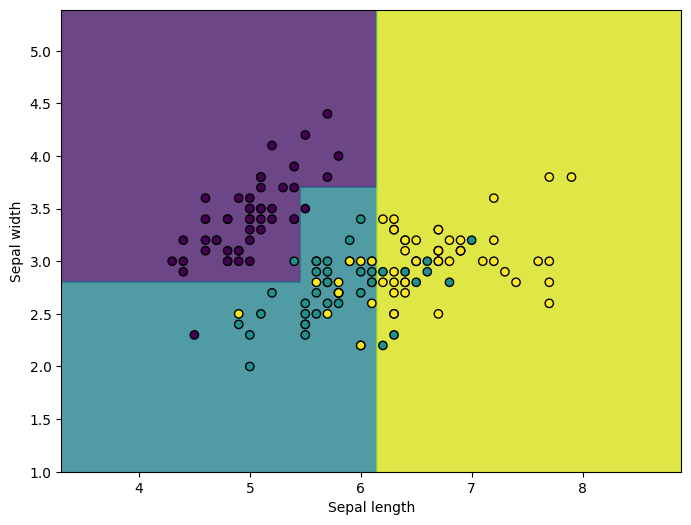

In [ ]:
# Train a DecisionTreeClassifier
clf4 = DecisionTreeClassifier(max_leaf_nodes=6)
clf4.fit(X_train, y_train)

# Check accuracy
y_pred = clf4.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf4, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### 5. **Maximum Features**: This strategy considers only a subset of features for deciding a split at each node. The number of features to consider can be defined and this helps in reducing overfitting.

Accuracy: 0.8


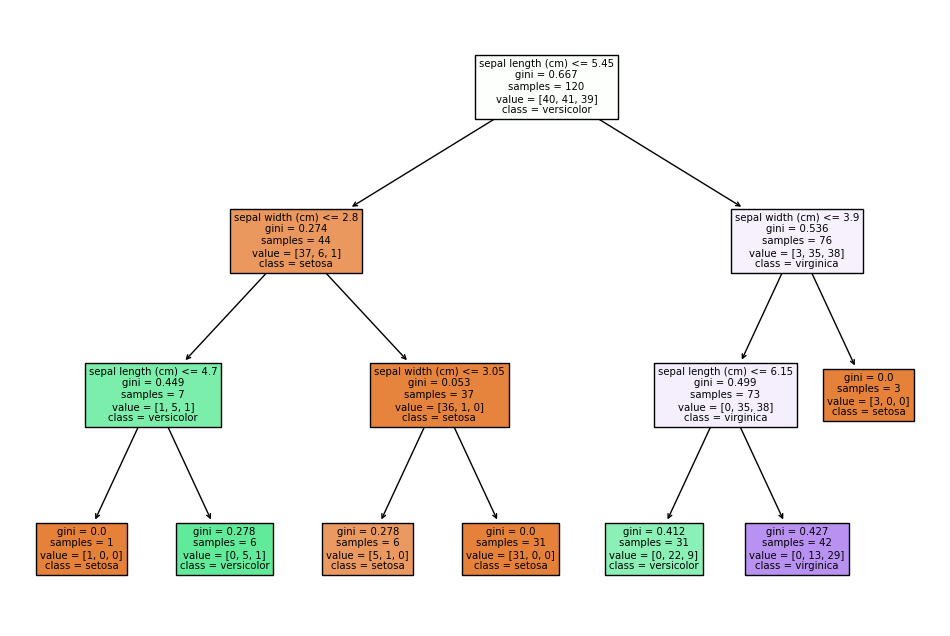

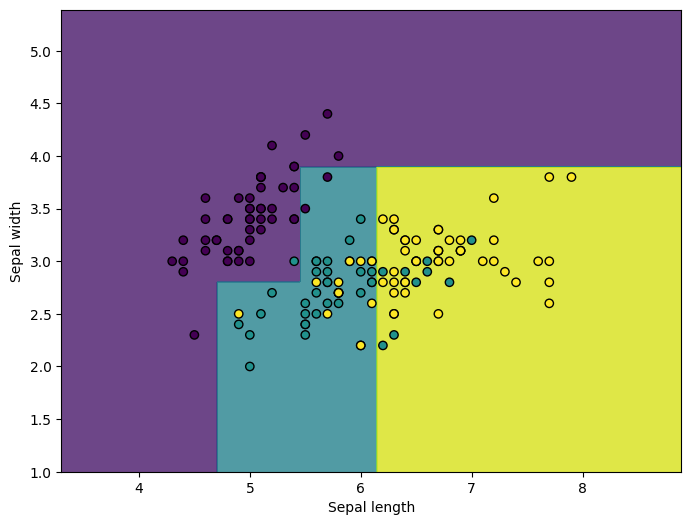

In [ ]:
# Train a DecisionTreeClassifier
clf5 = DecisionTreeClassifier(max_depth=3,max_features=1)
clf5.fit(X_train, y_train)

# Check accuracy
y_pred = clf5.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf5, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### 6. **Minimum Impurity Decrease:** This strategy allows a node to be split if the impurity decrease of the split is above a certain threshold. Impurity measures how mixed the classes within a node are. If the decrease is too small, the node becomes a leaf node.

Accuracy: 0.6333333333333333


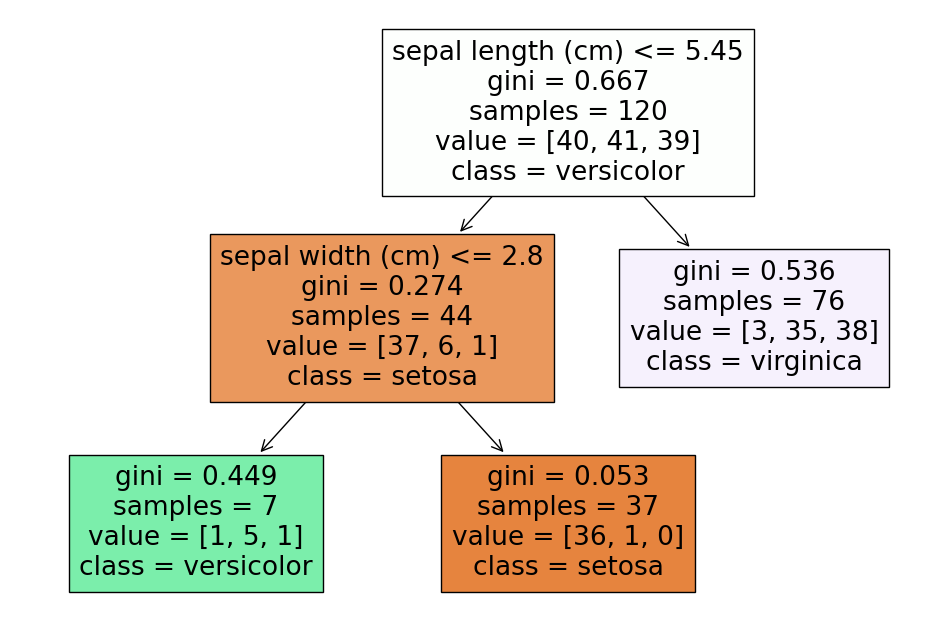

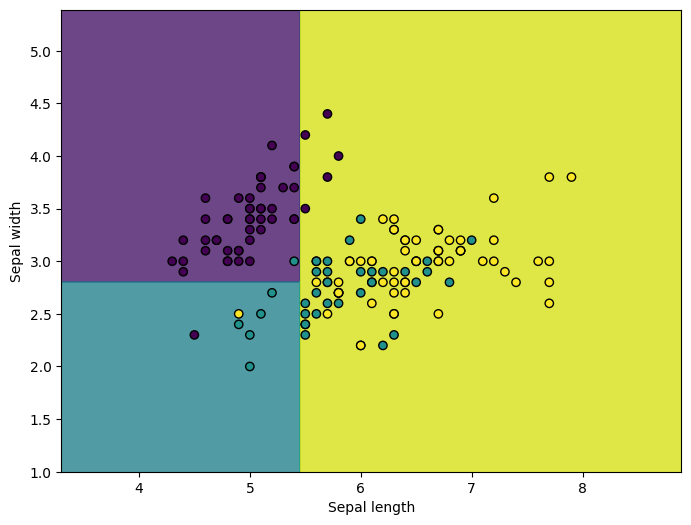

In [4]:
# Train a DecisionTreeClassifier
clf6 = DecisionTreeClassifier(min_impurity_decrease=0.05)
clf6.fit(X_train, y_train)

# Check accuracy
y_pred = clf6.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf6, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf6.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()